In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('bigdatamart_Train.csv')

In [3]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [59]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

##### Columns :
    1. Item_Identifier	- Unique product ID
    2. Item_Weight	- Weight of product
    3. Item_Fat_Content - Whether the product is low fat or not
    4. Item_Visibility	- The % of total display area of all products in a store allocated to the particular product
    5. Item_Type - The category to which the product belongs
    6. Item_MRP - Maximum Retail Price (list price) of the product
    7. Outlet_Identifier - Unique store ID
    8. Outlet_Establishment_Year - The year in which store was established
    9. Outlet_Size - The size of the store in terms of ground area covered
    10. Outlet_Location_Type - The type of city in which the store is located
    11. Outlet_Type - Whether the outlet is just a grocery store or some sort of supermarket
    12. Item_Outlet_Sales - Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Pre-Processing

In [6]:
df_train.isnull().sum().any()

True

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We see that there are outliers present in Item_Weight and Outlet_size

In [8]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We see that we have Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size, Outlet_Location_Type,Outlet_Type as object type

In [9]:
object_type_columns = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [10]:
def object_type_columns(columns):
    print(columns,'Mode = ',df_train[columns].mode())
    print()
    print(df_train[columns].value_counts())
    sns.countplot(df_train[columns],palette='mako')
    plt.xticks(rotation=90)
    plt.show()
    print()
    print()

Item_Fat_Content Mode =  0    Low Fat
dtype: object

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


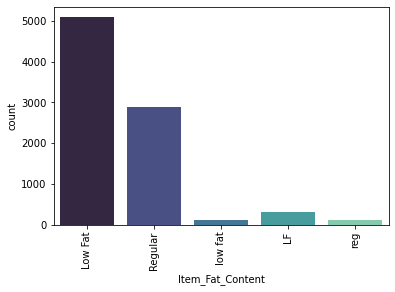

In [11]:
object_type_columns('Item_Fat_Content')

We see that item fat content has 5 categories but there are duplicates Low Fat, low fat and LF seems to be one and the same and Regular and reg seem to be the same, lets work on these

In [12]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['low fat', 'LF'],'Low Fat')

In [14]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('reg','Regular')

In [15]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Item_Fat_Content Mode =  0    Low Fat
dtype: object

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


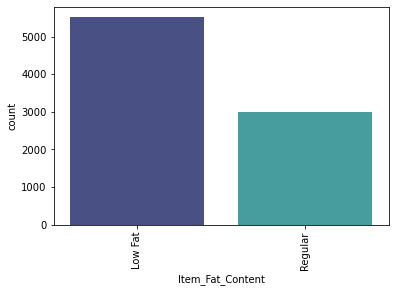

In [16]:
object_type_columns('Item_Fat_Content')

Duplicate columns removed. Low Fat seems to have higher count than Regular

Item_Type Mode =  0    Fruits and Vegetables
dtype: object

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


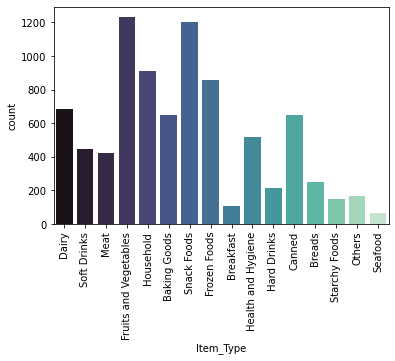

In [17]:
object_type_columns('Item_Type')

We see there are 16 sub categories in Item_Type no categories are repeated, food and Fruits and Vegetables have the highest count and Seafood has the lowest count

Outlet_Identifier Mode =  0    OUT027
dtype: object

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


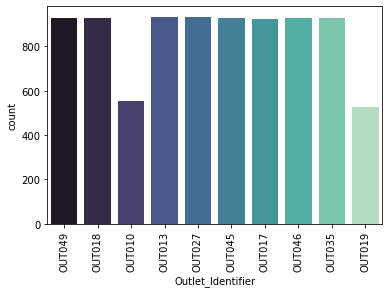

In [18]:
object_type_columns('Outlet_Identifier')

There are 10 sub categories in Outlet_Identifier

Outlet_Size Mode =  0    Medium
dtype: object

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


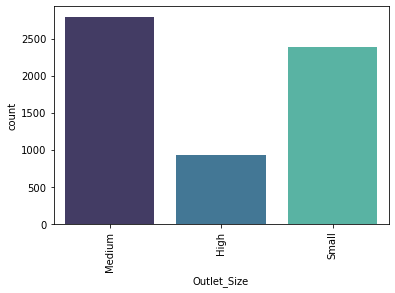

In [19]:
object_type_columns('Outlet_Size')

Outlet_Size is divided into 3 sub categories Medium,High and small

Outlet_Location_Type Mode =  0    Tier 3
dtype: object

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


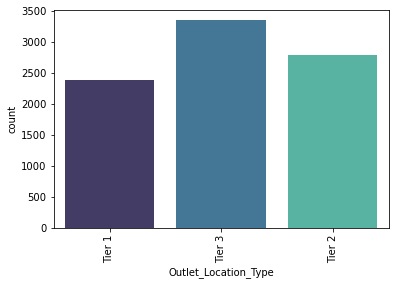

In [20]:
object_type_columns('Outlet_Location_Type')

Outlet_Location_Type is divided into 3 sub categories with Tier 3 having the highest count

Outlet_Type Mode =  0    Supermarket Type1
dtype: object

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


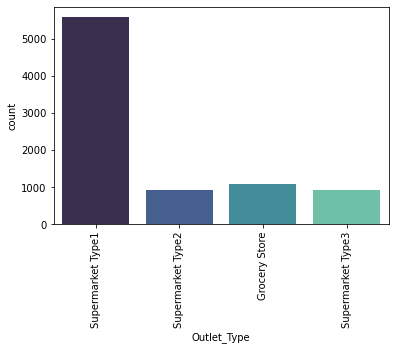

In [21]:
object_type_columns('Outlet_Type')

Outlet_Type is sub divided into 4 categories with Supermarket Type1 having the highest count

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

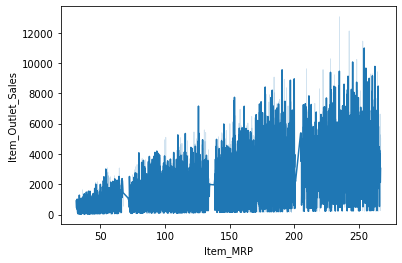

In [22]:
sns.lineplot(x=df_train['Item_MRP'],y=df_train['Item_Outlet_Sales'])

We see that as the Item_MRP increases, so does the Sales

In [23]:
df_train['Item_Weight'].isnull().sum()

1463

##### Filling the missing values in Item_Weight with just the mean would be an incorrect approach as the item weights are based on Items and weights may vary largly based on the Type of Item

In [24]:
Item_Identifier_Weight = df_train.pivot_table(values='Item_Weight',index='Item_Type')
Item_Identifier_Weight

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [25]:
missing_Item_Weight = df_train['Item_Weight'].isnull()

In [26]:
for i,item in enumerate(df_train['Item_Type']):
    if missing_Item_Weight[i]:
        df_train['Item_Weight'][i] = Item_Identifier_Weight.loc[item]['Item_Weight']

In [27]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###### Filling null values in Outlet_Size with mode of outlet size in relation with Outlet_Type

In [28]:
Outlet_Type_Size = df_train.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()))
Outlet_Type_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [29]:
missing_Outlet_Size = df_train['Outlet_Size'].isnull()

In [30]:
df_train.loc[missing_Outlet_Size,'Outlet_Size'] = df_train.loc[missing_Outlet_Size,'Outlet_Type'].apply(lambda x: Outlet_Type_Size[x])

In [31]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### No more missing values

In [32]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [33]:
df_train['Item_Visibility'].replace(0,0.066132,inplace=True)

In [34]:
df_train[df_train['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


#### No more rows with Item_Visibility as 0

In [35]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#### We could reduce the value of Outlet_Establishment_Year by substracting it with 2013 the year in which the data was collected to get a smaller value

In [36]:
df_train['Outlet_Establishment_Year']=2013-df_train['Outlet_Establishment_Year']

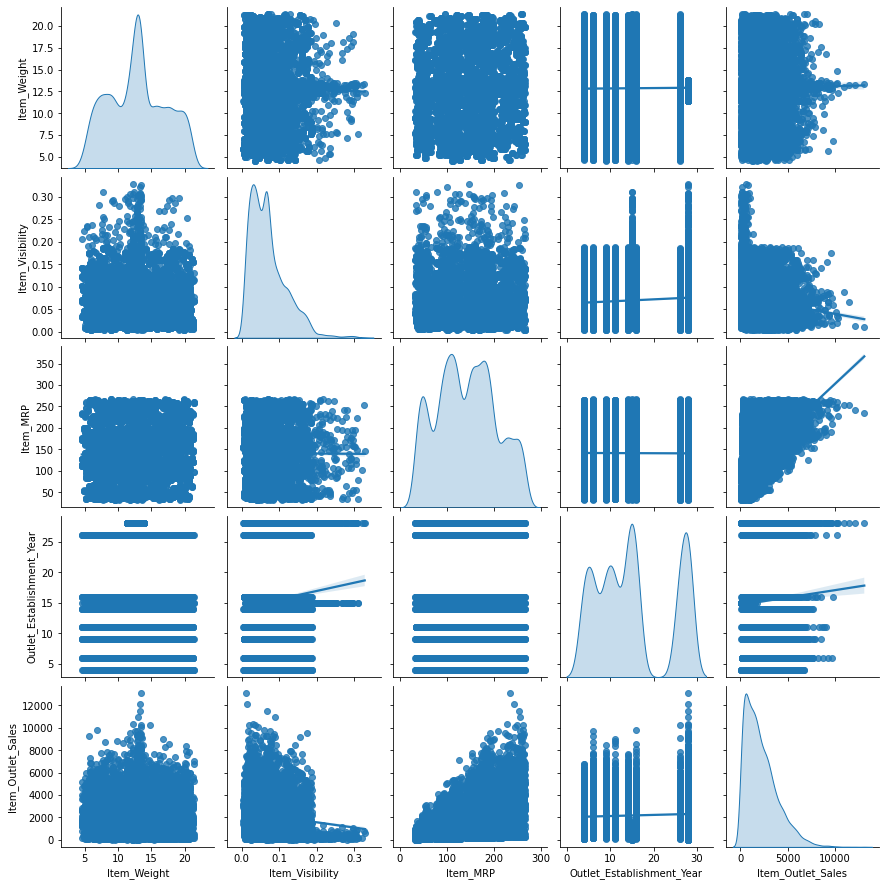

In [37]:
sns.pairplot(df_train,diag_kind='kde',kind='reg')

We see that the data doesnot follow linear distribution nor is the data normalized

### Checking Correlation

In [38]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017222,0.025821,0.008376,0.012088
Item_Visibility,-0.017222,1.000000,-0.005259,0.078355,-0.134138
Item_MRP,0.025821,-0.005259,1.000000,-0.005020,0.567574
Outlet_Establishment_Year,0.008376,0.078355,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.012088,-0.134138,0.567574,0.049135,1.000000


<AxesSubplot:>

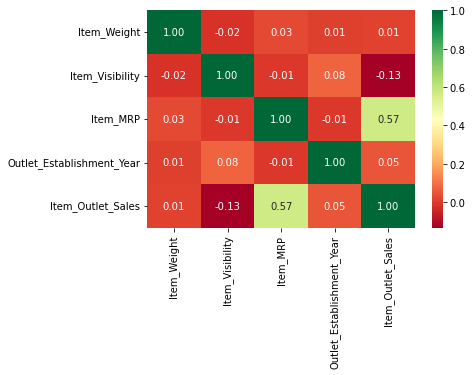

In [39]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',fmt='.2f')

##### Features are both positively and negitively correlated.
    - Max Correlation = Item_MRP(57%)
    - Least Correlation = Item_Weight (1%)

### Checking Skewness

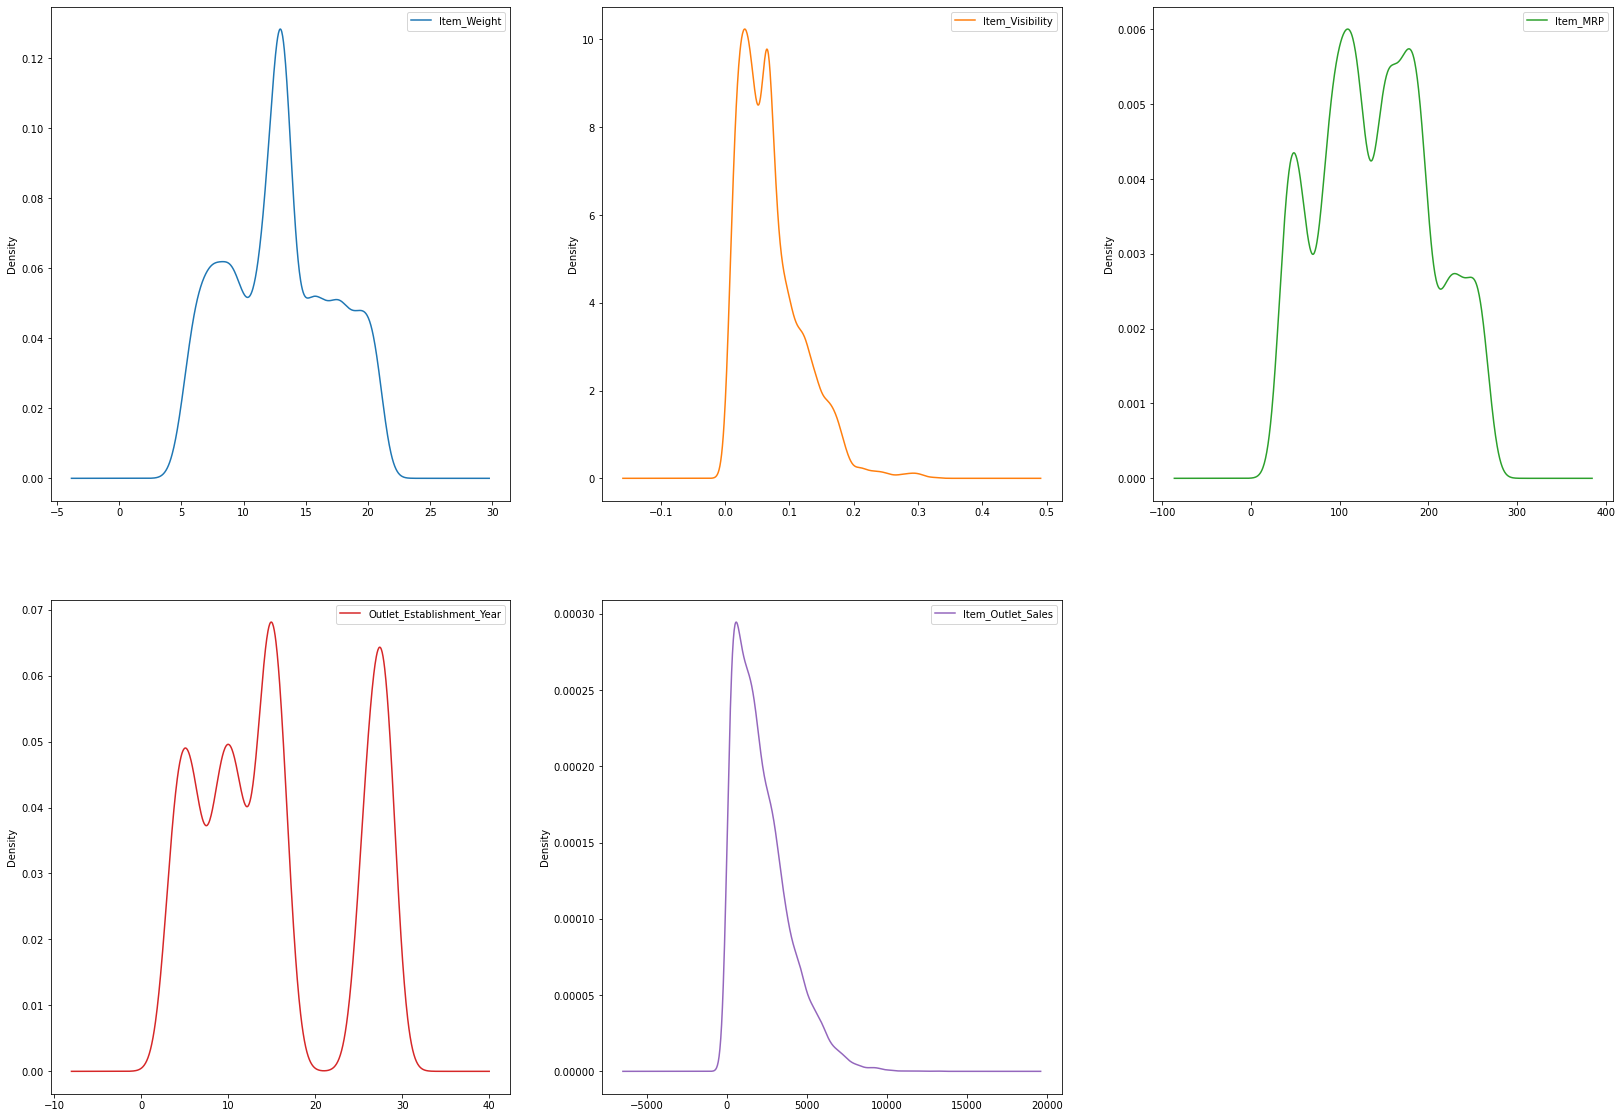

In [40]:
df_train.plot(kind='density',subplots=True,sharex=False,layout=(2,3),figsize=(28,20))
plt.show()

In [41]:
df_train.skew().sort_values(ascending=True)

Item_Weight                  0.089537
Item_MRP                     0.127202
Outlet_Establishment_Year    0.396641
Item_Outlet_Sales            1.177531
Item_Visibility              1.286877
dtype: float64

Lets set the skewness threshold to +/-0.5. We see Item_Visibility has the Highest skewness 1.286877 followed by Item_Outlet_Sales which is our target varriable hence it can be ignored

### Checking Outliers

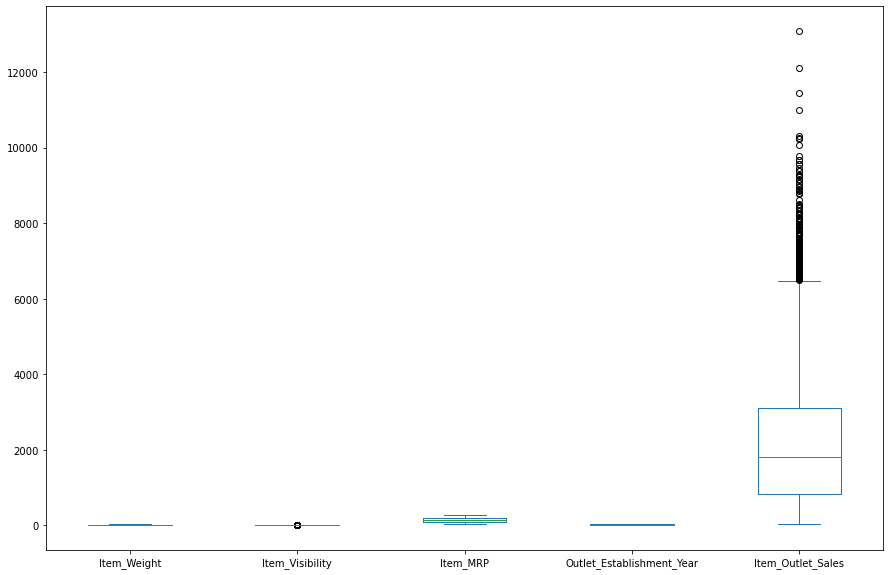

In [42]:
df_train.plot(kind = 'box',figsize=(15,10))
plt.show()

We see a very few outliers in Item_visibility which can be handled and in our target varriable 

### VIF`

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['Values'] = [variance_inflation_factor(dataset.values, i )for i in range(dataset.shape[1])]
    return(vif)

In [45]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [46]:
non_cat_columns = []
for i in df_train.dtypes.index:
    if df_train.dtypes[i] != 'object':
        non_cat_columns.append(i)
non_cat_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [47]:
Features = df_train[['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year']]
Features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,14
1,5.920,0.019278,48.2692,4
2,17.500,0.016760,141.6180,14
3,19.200,0.066132,182.0950,15
4,8.930,0.066132,53.8614,26
...,...,...,...,...
8518,6.865,0.056783,214.5218,26
8519,8.380,0.046982,108.1570,11
8520,10.600,0.035186,85.1224,9
8521,7.210,0.145221,103.1332,4


In [48]:
calculate_vif(Features)

,Features,Values
0,Item_Weight,5.690871
1,Item_Visibility,2.807866
2,Item_MRP,4.652789
3,Outlet_Establishment_Year,3.701402


##### Setting the threshold for VIF as 10, all the values are below the Threshold

### Encoding the object type variables

In [49]:
df_train = pd.get_dummies(df_train,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [50]:
df_train.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Identifier                 object
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Regular           uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
dtype: object

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col = ['Item_Identifier','Item_Type','Outlet_Identifier']
for i in col:
    df_train[i] = le.fit_transform(df_train[i])
df_train

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.300,0.016047,4,249.8092,9,14,3735.1380,1,0,0,1,0,1,0,0,0,1,0,0
1,8,5.920,0.019278,14,48.2692,3,4,443.4228,0,1,0,1,0,0,0,1,0,0,1,0
2,662,17.500,0.016760,10,141.6180,9,14,2097.2700,1,0,0,1,0,1,0,0,0,1,0,0
3,1121,19.200,0.066132,6,182.0950,0,15,732.3800,0,1,0,0,1,0,0,1,1,0,0,0
4,1297,8.930,0.066132,9,53.8614,1,26,994.7052,1,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,13,214.5218,1,26,2778.3834,1,0,1,0,0,0,0,1,0,1,0,0
8519,897,8.380,0.046982,0,108.1570,7,11,549.2850,0,1,0,0,1,0,1,0,0,1,0,0
8520,1357,10.600,0.035186,8,85.1224,6,9,1193.1136,1,0,0,0,1,0,1,0,0,1,0,0
8521,681,7.210,0.145221,13,103.1332,3,4,1845.5976,0,1,0,1,0,0,0,1,0,0,1,0


We could drop Item_Identifier and Outlet_Identifier 

In [52]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

### Removing Outliers

In [53]:
from scipy.stats import zscore

z = np.abs(zscore(df_train))
z.shape

(8523, 18)

In [54]:
df_train = df_train[(z<3).all(axis=1)]
df_train.shape

(8334, 18)

### Percentage Data Loss

In [55]:
percentage_loss = (8523-8334)/8523*100
percentage_loss

2.2175290390707496

### Splitting the Data in x and y

In [56]:
x = df_train.drop('Item_Outlet_Sales',axis=1)
x.shape

(8334, 17)

In [57]:
y = df_train['Item_Outlet_Sales']
y.shape

(8334,)

### Normalizing using power_transform

In [58]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [59]:
type(x_new)

numpy.ndarray

In [60]:
X = pd.DataFrame(x_new,columns=x.columns)
X

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.815182,-1.442577,-0.713176,1.641179,0.076166,0.736918,-0.736918,-0.353768,1.432741,-1.130892,1.607643,-0.705199,-0.797724,-0.365893,0.708826,-0.353983,-0.342502
1,-1.722673,-1.313299,1.506161,-1.591277,-1.644252,-1.357004,1.357004,-0.353768,1.432741,-1.130892,-0.622029,-0.705199,1.253566,-0.365893,-1.410784,2.824996,-0.342502
2,1.077870,-1.413695,0.684375,0.097721,0.076166,0.736918,-0.736918,-0.353768,1.432741,-1.130892,1.607643,-0.705199,-0.797724,-0.365893,0.708826,-0.353983,-0.342502
3,1.435236,0.163342,-0.216274,0.707801,0.194299,-1.357004,1.357004,-0.353768,-0.697963,0.884258,-0.622029,-0.705199,1.253566,2.733041,-1.410784,-0.353983,-0.342502
4,-0.909612,0.163342,0.468105,-1.470848,1.233504,0.736918,-0.736918,2.826710,-0.697963,-1.130892,-0.622029,-0.705199,1.253566,-0.365893,0.708826,-0.353983,-0.342502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,-1.457711,-0.079987,1.306381,1.166262,1.233504,0.736918,-0.736918,2.826710,-0.697963,-1.130892,-0.622029,-0.705199,1.253566,-0.365893,0.708826,-0.353983,-0.342502
8330,-1.051952,-0.359838,-1.922086,-0.449118,-0.316509,-1.357004,1.357004,-0.353768,-0.697963,0.884258,-0.622029,1.418040,-0.797724,-0.365893,0.708826,-0.353983,-0.342502
8331,-0.491118,-0.734169,0.246449,-0.856689,-0.619947,0.736918,-0.736918,-0.353768,-0.697963,0.884258,-0.622029,1.418040,-0.797724,-0.365893,0.708826,-0.353983,-0.342502
8332,-1.363392,1.553135,1.306381,-0.535503,-1.644252,-1.357004,1.357004,-0.353768,1.432741,-1.130892,-0.622029,-0.705199,1.253566,-0.365893,-1.410784,2.824996,-0.342502


In [61]:
for i in Features:
    print('skewness for ',i,'-',X[i].skew())

skewness for  Item_Weight - -0.07044531289898924
skewness for  Item_Visibility - 0.12200479466878035
skewness for  Item_MRP - -0.11261306317764727
skewness for  Outlet_Establishment_Year - -0.057610009331646554


skewness seems to be below the threshold

### Scalling the Model

In [62]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(x)
X

array([[0.28252456, 0.0586261 , 0.26666667, ..., 1.        , 0.        ,
        0.        ],
       [0.08127419, 0.07381266, 0.93333333, ..., 0.        , 1.        ,
        0.        ],
       [0.77076511, 0.06197641, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.35992855, 0.14858672, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.15808276, 0.66579118, 0.86666667, ..., 0.        , 1.        ,
        0.        ],
       [0.61000298, 0.19414294, 0.93333333, ..., 1.        , 0.        ,
        0.        ]])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [64]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print('At random_state',i,'the training accuracy is',r2_score(y_train,pred_train))
    print('At random_state',i,'the testing accuracy is',r2_score(y_test,pred_test))
    print()

At random_state 0 the training accuracy is 0.5500406735783365
At random_state 0 the testing accuracy is 0.5763861808700517

At random_state 1 the training accuracy is 0.5559156994174141
At random_state 1 the testing accuracy is 0.5587906867410619

At random_state 2 the training accuracy is 0.5511183810502154
At random_state 2 the testing accuracy is 0.5725899666801384

At random_state 3 the training accuracy is 0.5567140119511694
At random_state 3 the testing accuracy is 0.5569955775178301

At random_state 4 the training accuracy is 0.5559931381452906
At random_state 4 the testing accuracy is 0.5594067590033812

At random_state 5 the training accuracy is 0.5577434321566819
At random_state 5 the testing accuracy is 0.5536301700921961

At random_state 6 the training accuracy is 0.5583261226486761
At random_state 6 the testing accuracy is 0.5523790295439013

At random_state 7 the training accuracy is 0.5555325342869097
At random_state 7 the testing accuracy is 0.5605869847561811

At rando

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=3)
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.5569955775178301


### Cross-Valiidation of the Model

In [66]:
Training_Accuracy = r2_score(y_train,pred_train)
Testing_Accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score = cross_val_score(lr,X,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score for training is {Training_Accuracy} and the accuracy for testing is {Testing_Accuracy}")
    print()

At cross fold 2 the cv score is 0.5546117177554619 and the accuracy score for training is -0.5498206730833184 and the accuracy for testing is 0.5569955775178301

At cross fold 3 the cv score is 0.5551916765012822 and the accuracy score for training is -0.5498206730833184 and the accuracy for testing is 0.5569955775178301

At cross fold 4 the cv score is 0.5545223008017626 and the accuracy score for training is -0.5498206730833184 and the accuracy for testing is 0.5569955775178301

At cross fold 5 the cv score is 0.5550585490059967 and the accuracy score for training is -0.5498206730833184 and the accuracy for testing is 0.5569955775178301

At cross fold 6 the cv score is 0.5554019666217688 and the accuracy score for training is -0.5498206730833184 and the accuracy for testing is 0.5569955775178301

At cross fold 7 the cv score is 0.5554550107736447 and the accuracy score for training is -0.5498206730833184 and the accuracy for testing is 0.5569955775178301

At cross fold 8 the cv score

The best cv is 7

In [67]:
def Model_Reg(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,X,y,cv = 7)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report')
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    coef = pd.Series(model.coef_,x.columns).sort_values(ascending=False)
    coef.plot(kind= 'bar', title = 'Model Coefficients')
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

In [68]:
def Model_Tree(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,X,y,cv = 7)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report')
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
    coef.plot(kind= 'bar', title = 'Model Coefficients')
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

Model Report
MSE 1071208.5467635812
Mean Absolute Error 790.6653006197017
r2_score 55.69955775178301
CV 55.54550107736447
Difference between r2_score and cv is  0.1540566744185412


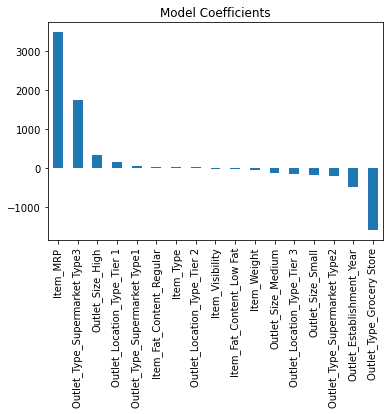

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
Model_Reg(lr)

Model Report
MSE 1071548.0679570013
Mean Absolute Error 790.6653006197017
r2_score 55.69955775178301
CV 55.55458350081336
Difference between r2_score and cv is  0.14497425096965344


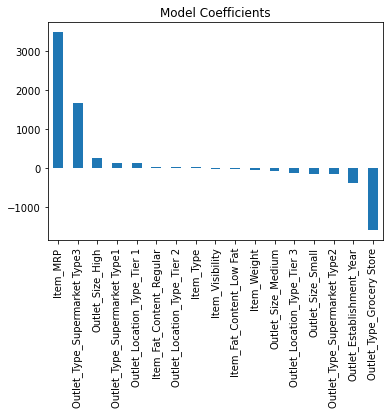

In [70]:
from sklearn.linear_model import Ridge
ridge = Ridge()
Model_Reg(ridge)

Model Report
MSE 1073254.1843225416
Mean Absolute Error 790.6653006197017
r2_score 55.69955775178301
CV 55.53416232709883
Difference between r2_score and cv is  0.1653954246841849


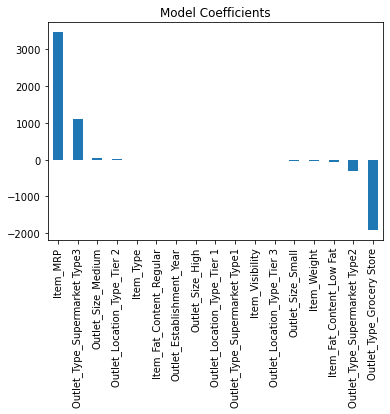

In [71]:
from sklearn.linear_model import Lasso
lasso = Lasso()
Model_Reg(lasso)

Model Report
MSE 2170624.971500403
Mean Absolute Error 790.6653006197017
r2_score 55.69955775178301
CV 14.924706563138596
Difference between r2_score and cv is  40.77485118864442


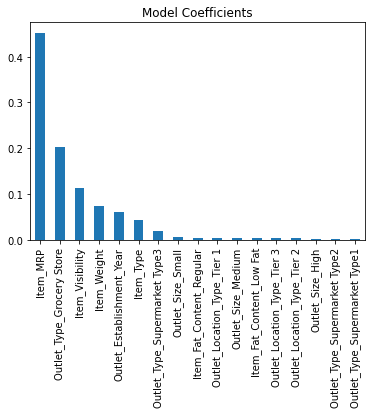

In [72]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
Model_Tree(dt)

Model Report
MSE 1177941.265200717
Mean Absolute Error 790.6653006197017
r2_score 55.69955775178301
CV 51.81409156571783
Difference between r2_score and cv is  3.8854661860651802


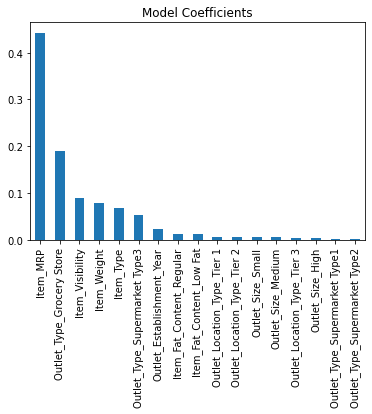

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
Model_Tree(et)

Model Report
MSE 1153901.2788945332
Mean Absolute Error 790.6653006197017
r2_score 55.69955775178301
CV 53.87122991038032
Difference between r2_score and cv is  1.8283278414026896


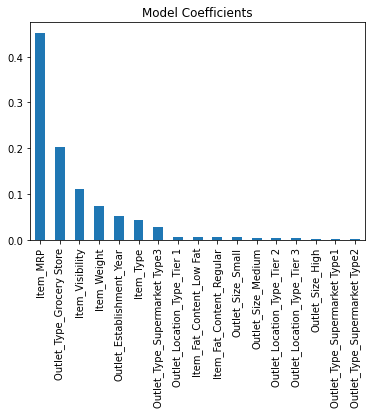

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
Model_Tree(rf)

Model Report
MSE 1068001.8671107742
Mean Absolute Error 790.6653006197017
r2_score 55.69955775178301
CV 55.89129262937051
Difference between r2_score and cv is  -0.19173487758749985


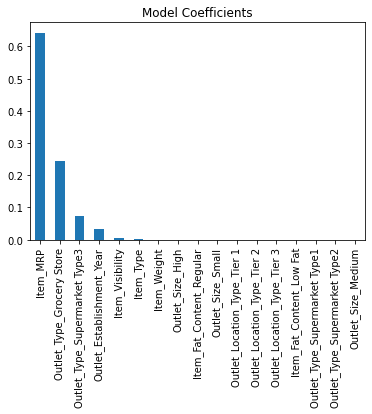

In [75]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor()
Model_Tree(ad)

### Hyper Parameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

Parameters = {'loss':['linear', 'square', 'exponential'],'learning_rate':[0.001,0.01,0.1,1,10],'n_estimators':list(range(0,100,10))}

gcv = GridSearchCV(ad,Parameters,cv=7)
gcv.fit(x_train,y_train)
gcv.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 80}

In [77]:
gcv.best_estimator_

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=80)

Model Report
MSE 1056027.3879208385
Mean Absolute Error 790.6653006197017
r2_score 55.69955775178301
CV 56.32714140180456
Difference between r2_score and cv is  -0.627583650021549


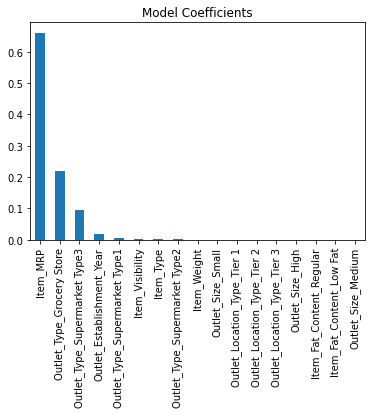

In [78]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=90)
Model_Tree(ad)

In [79]:
from sklearn.model_selection import GridSearchCV

Parameters = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False],"solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}


gcv = GridSearchCV(ridge,Parameters,cv=7)
gcv.fit(x_train,y_train)
gcv.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'sag'}

In [80]:
gcv.best_estimator_

Ridge(alpha=1, solver='sag')

Model Report
MSE 1071619.702363911
Mean Absolute Error 790.6653006197017
r2_score 55.69955775178301
CV 55.55579591123173
Difference between r2_score and cv is  0.14376184055127794


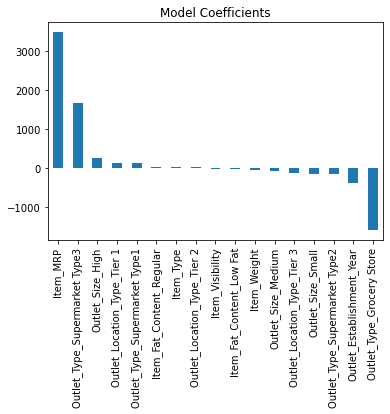

In [81]:
ridge = Ridge(alpha=1, solver='sag')
Model_Reg(ridge)

### Best Model : Ridge(With Hyper Parameter Tuning)

Model Report
MSE 1071533.271050473
Mean Absolute Error 790.6653006197017
r2_score 55.69955775178301
CV 55.556802796304495
Difference between r2_score and cv is  0.1427549554785159


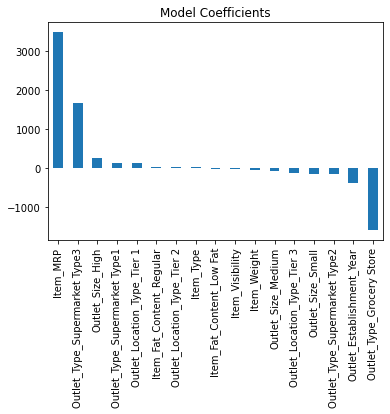

In [82]:
ridge = Ridge(alpha=1, solver='sag')
Model_Reg(ridge)

### Saving the File

In [83]:
import pickle
filename = 'Big_Data_Mart_Sales_Projection.pkl'
pickle.dump(ridge,open(filename,'wb'))

### Preparing the Test Data

In [21]:
df_test = pd.read_csv('bigdatamart_Test.csv')

In [22]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [23]:
df_test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [24]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace(['low fat', 'LF'],'Low Fat')

In [25]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('reg','Regular')

In [26]:
df_test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [27]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Filling Null Values in Item_Weight

In [28]:
Item_Identifier_Weight = df_test.pivot_table(values='Item_Weight',index='Item_Type')
Item_Identifier_Weight

,Item_Weight
Item_Type,
Baking Goods,12.272418
Breads,10.866799
Breakfast,13.759603
Canned,12.393565
Dairy,12.955040
Frozen Foods,12.101543
Fruits and Vegetables,13.146659
Hard Drinks,11.844417
Health and Hygiene,13.216929


In [29]:
missing_Item_Weight = df_test['Item_Weight'].isnull()

In [30]:
for i,item in enumerate(df_test['Item_Type']):
    if missing_Item_Weight[i]:
        df_test['Item_Weight'][i] = Item_Identifier_Weight.loc[item]['Item_Weight']

In [31]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Filling Null Values in Outlet_Size

In [32]:
Outlet_Type_Size = df_test.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()))
Outlet_Type_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [33]:
missing_Outlet_Size = df_test['Outlet_Size'].isnull()

In [34]:
df_test.loc[missing_Outlet_Size,'Outlet_Size'] = df_test.loc[missing_Outlet_Size,'Outlet_Type'].apply(lambda x: Outlet_Type_Size[x])

In [35]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### No more missing values

In [36]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.694378,0.065684,141.023273,1997.828903
std,4.252967,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.684256,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [37]:
df_test[df_test['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
56,FDA09,13.350000,Regular,0.0,Snack Foods,179.6660,OUT013,1987,High,Tier 3,Supermarket Type1
90,FDN39,19.350000,Regular,0.0,Meat,165.7816,OUT045,2002,Small,Tier 2,Supermarket Type1
109,FDU14,17.750000,Low Fat,0.0,Dairy,249.7750,OUT018,2009,Medium,Tier 3,Supermarket Type2
125,FDZ36,12.272418,Regular,0.0,Baking Goods,186.4240,OUT027,1985,Medium,Tier 3,Supermarket Type3
140,DRF48,5.730000,Low Fat,0.0,Soft Drinks,188.3898,OUT010,1998,Small,Tier 3,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
5643,FDQ19,13.146659,Regular,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store
5648,FDK26,12.393565,Regular,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3
5654,FDQ57,7.275000,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1
5661,DRG37,11.691965,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [38]:
df_test['Item_Visibility'].replace(0,0.066132,inplace=True)

In [39]:
df_test[df_test['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


##### No more rows with Item_Visibility as 0

In [40]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.60000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.31500,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.95504,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.60000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.00000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1
5679,FDJ26,15.30000,Regular,0.066132,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1


We could reduce the value of Outlet_Establishment_Year by substracting it with 2013 the year in which the data was collected to get a smaller value

In [41]:
df_test['Outlet_Establishment_Year']=2013-df_test['Outlet_Establishment_Year']

### Encoding the object type variables

In [42]:
df_test = pd.get_dummies(df_test,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col = ['Item_Identifier','Item_Type','Outlet_Identifier']
for i in col:
    df_test[i] = le.fit_transform(df_test[i])
df_test

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1103,20.75000,0.007565,13,107.8622,9,14,1,0,0,1,0,1,0,0,0,1,0,0
1,1067,8.30000,0.038428,4,87.3198,2,6,0,1,0,0,1,0,1,0,0,1,0,0
2,1406,14.60000,0.099575,11,241.7538,0,15,1,0,0,0,1,0,0,1,1,0,0,0
3,809,7.31500,0.015388,13,155.0340,2,6,1,0,0,0,1,0,1,0,0,1,0,0
4,1184,12.95504,0.118599,4,234.2300,5,28,0,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.50000,0.013496,13,141.3154,8,16,0,1,0,0,1,1,0,0,0,1,0,0
5677,306,7.60000,0.142991,15,169.1448,3,4,0,1,0,1,0,0,0,1,0,0,1,0
5678,1412,10.00000,0.073529,8,118.7440,7,11,1,0,0,0,1,0,1,0,0,1,0,0
5679,517,15.30000,0.066132,3,214.6218,2,6,0,1,0,0,1,0,1,0,0,1,0,0


### Dropping Item_Identifier and Outlet_Identifier

In [44]:
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

### Normalizing using power_transform

In [45]:
from sklearn.preprocessing import power_transform
x_new = power_transform(df_test)

In [46]:
type(x_new)

numpy.ndarray

In [47]:
df_Test = pd.DataFrame(x_new,columns=df_test.columns)
df_Test

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.765785,-1.837052,1.301686,-0.472017,0.050948,0.740811,-0.740811,-0.350325,1.432138,-1.134882,1.602644,-0.696584,-0.804750,-0.381568,0.726900,-0.349374,-0.351274
1,-1.033786,-0.633030,-0.712433,-0.835998,-1.185640,-1.349873,1.349873,-0.350325,-0.698257,0.881149,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274
2,0.491827,0.853423,0.892240,1.525375,0.168990,0.740811,-0.740811,-0.350325,-0.698257,0.881149,-0.623969,-0.696584,1.242623,2.620767,-1.375706,-0.349374,-0.351274
3,-1.304099,-1.492780,1.301686,0.290835,-1.185640,0.740811,-0.740811,-0.350325,-0.698257,0.881149,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274
4,0.120419,1.156296,-0.712433,1.424528,1.369280,-1.349873,1.349873,-0.350325,1.432138,-1.134882,-0.623969,-0.696584,1.242623,-0.381568,-1.375706,-0.349374,2.846782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.466314,-1.573358,1.301686,0.077563,0.281939,-1.349873,1.349873,-0.350325,-0.698257,0.881149,1.602644,-0.696584,-0.804750,-0.381568,0.726900,-0.349374,-0.351274
5677,-1.224701,1.470042,1.696978,0.504137,-1.649147,-1.349873,1.349873,-0.350325,1.432138,-1.134882,-0.623969,-0.696584,1.242623,-0.381568,-1.375706,2.862264,-0.351274
5678,-0.591404,0.332365,0.244553,-0.288074,-0.340301,0.740811,-0.740811,-0.350325,-0.698257,0.881149,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274
5679,0.645357,0.157248,-0.978099,1.156802,-1.185640,-1.349873,1.349873,-0.350325,-0.698257,0.881149,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274


### Scalling the Model

In [48]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_Test = mms.fit_transform(df_Test)

In [49]:
df_Test

array([[0.97101234, 0.04150368, 0.89064455, ..., 1.        , 0.        ,
        0.        ],
       [0.27423151, 0.30948111, 0.33344869, ..., 1.        , 0.        ,
        0.        ],
       [0.65393878, 0.64031901, 0.77737343, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.38433512, 0.52434785, 0.59819401, ..., 1.        , 0.        ,
        0.        ],
       [0.69215061, 0.48537231, 0.25995359, ..., 1.        , 0.        ,
        0.        ],
       [0.35266316, 0.65983024, 0.25995359, ..., 1.        , 0.        ,
        0.        ]])

### Reading Pickle file and Predicting Test Data

In [50]:
Model = pd.read_pickle(r'Big_Data_Mart_Sales_Projection.pkl')

In [51]:
Model

Ridge(alpha=1, solver='sag')

In [52]:
y_pred = Model.predict(df_Test)

In [57]:
y_pred

array([2017.76507801, 1765.80558643, 1796.56302327, ..., 2086.12915761,
       3541.43500145, 1515.86744475])

In [55]:
pd.options.display.max_columns=None
y = pd.Series(y_pred)

In [56]:
y

0       2017.765078
1       1765.805586
2       1796.563023
3       2743.680096
4       4918.595853
5       2135.548781
6        750.036729
7       2722.098323
8       1799.740647
9       3164.858383
10      2162.936763
11      1563.287353
12      1861.461344
13      2254.242441
14      1019.999021
15      2732.494298
16      3172.877499
17      2903.313030
18      3189.854702
19      1194.368989
20      2953.890390
21      3710.542970
22       875.754627
23       601.812934
24      2982.798399
25      1494.884528
26       910.334245
27      2723.411902
28      3762.170429
29      2090.991993
30     -1293.883959
31      3022.369530
32       580.094445
33      4732.525483
34      2846.909680
35      4583.319029
36      2701.405075
37        90.587843
38      3190.312096
39      3094.961590
40      2230.809310
41       109.761270
42      2971.154350
43      2271.749780
44      1514.090795
45      2043.415277
46      -906.631116
47      3024.234802
48      3825.529168
49      2173.194803
